**What is Logistic Regression, and how does it differ from Linear Regression**

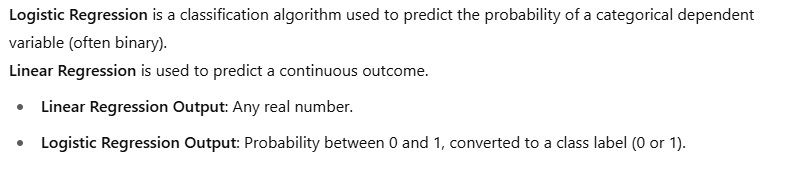

**What is the mathematical equation of Logistic Regression?**

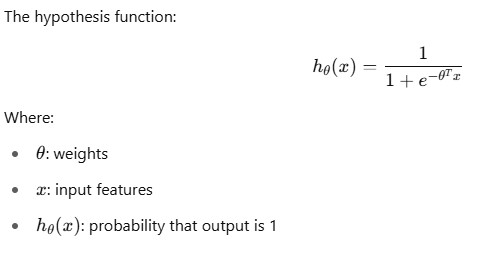

**Why do we use the Sigmoid function in Logistic Regression?**

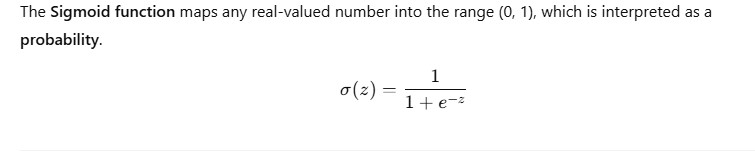

**What is the cost function of Logistic Regression?**

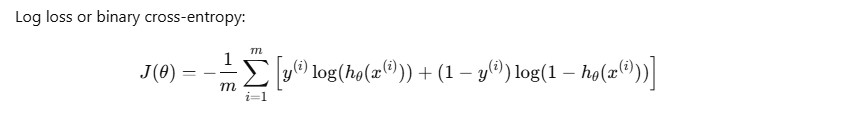

**What is Regularization in Logistic Regression? Why is it needed?**

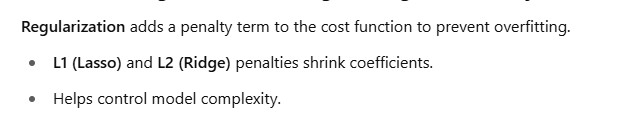

**Explain the difference between Lasso, Ridge, and Elastic Net regression**

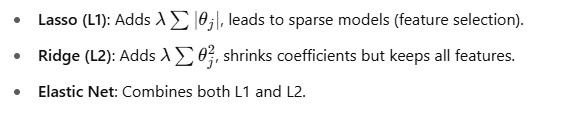

**When should we use Elastic Net instead of Lasso or Ridge?**

Use Elastic Net when:

There are many correlated features.

You want both feature selection (from Lasso) and stability (from Ridge).

**What is the impact of the regularization parameter (λ) in Logistic Regression?**

High λ: Strong regularization → smaller coefficients → less overfitting, but may underfit.

Low λ: Weak regularization → more flexibility, but may overfit.



**What are the key assumptions of Logistic Regression?**

Linearity in the log-odds: The logit is a linear function of inputs.

Independent observations.

Low multicollinearity among independent variables.

Large sample size for stable estimates.

**What are some alternatives to Logistic Regression for classification tasks?**

Support Vector Machines (SVM)

Decision Trees

Random Forest

Gradient Boosting (XGBoost, LightGBM)

K-Nearest Neighbors (KNN)

Neural Networks

**What are Classification Evaluation Metrics?**

Accuracy

Precision

Recall

F1 Score

ROC-AUC

Log Loss

Confusion Matrix



**How does class imbalance affect Logistic Regression?**

Skews the decision boundary toward the majority class.

Reduces recall for the minority class.

Use class weights, resampling, or ROC-AUC/F1 instead of accuracy.



**What is Hyperparameter Tuning in Logistic Regression?**
Tuning parameters such as:

C (inverse of λ) for regularization strength.

Penalty type: L1, L2, or Elastic Net.

Solver choice.
Use GridSearchCV or RandomizedSearchCV.

**What are different solvers in Logistic Regression? Which one should be used?**

liblinear: For small datasets, supports L1.

saga: Large datasets, supports L1, L2, Elastic Net.

lbfgs: Default for L2, efficient for multiclass.

newton-cg: Like lbfgs, handles L2.

Choose based on:

Dataset size

Regularization type

**How is Logistic Regression extended for multiclass classification?**

One-vs-Rest (OvR): One model per class vs all others.

Multinomial (Softmax): Uses softmax function and a single model for all classes.

**What are the advantages and disadvantages of Logistic Regression?**

Advantages:

Simple and interpretable

Fast training

Works well with linearly separable data

Disadvantages:

Assumes linear decision boundary

Not suitable for complex patterns

**What are some use cases of Logistic Regression?**

Medical diagnosis (e.g., cancer detection)

Spam detection

Customer churn prediction

Credit scoring

Click-through rate prediction

**What is the difference between Softmax Regression and Logistic**

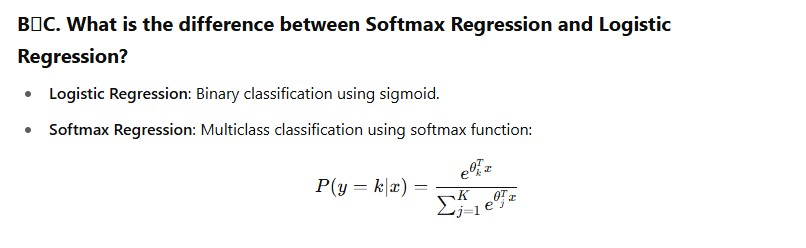


**How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?**

Use OvR for simpler interpretation and smaller data.

Use Softmax (multinomial) when:

All classes are equally important

You need better calibration of probabilities.

In [67]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score, cohen_kappa_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_digits
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multiclass import OneVsOneClassifier
from joblib import dump, load

In [68]:
# 1. Load dataset and split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 1.0


In [69]:
# 2. L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)
model_l1.fit(X_train, y_train)
print("L1 Accuracy:", model_l1.score(X_test, y_test))

L1 Accuracy: 1.0


In [70]:
# 3. L2 Regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=200)
model_l2.fit(X_train, y_train)
print("L2 Accuracy:", model_l2.score(X_test, y_test))
print("Coefficients:", model_l2.coef_)


L2 Accuracy: 1.0
Coefficients: [[ 0.3711229   1.409712   -2.15210117 -0.95474179]
 [ 0.49400451 -1.58897112  0.43717015 -1.11187838]
 [-1.55895271 -1.58893375  2.39874554  2.15556209]]


In [71]:
# 4. Elastic Net
model_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=500)
model_elastic.fit(X_train, y_train)
print("Elastic Net Accuracy:", model_elastic.score(X_test, y_test))


Elastic Net Accuracy: 1.0


In [72]:
# 5. Multiclass OvR
model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=200)
model_ovr.fit(X_train, y_train)
print("OvR Accuracy:", model_ovr.score(X_test, y_test))

OvR Accuracy: 1.0


In [73]:
# 6. GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Grid Accuracy:", grid.score(X_test, y_test))

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Grid Accuracy: 1.0


In [74]:

# 7. Stratified K-Fold
kfold = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, iris.data, iris.target, cv=kfold)
print("Stratified K-Fold Avg Accuracy:", scores.mean())

Stratified K-Fold Avg Accuracy: 0.9733333333333334


In [75]:
 RandomizedSearchCV
params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
rand = RandomizedSearchCV(LogisticRegression(max_iter=500), params, n_iter=10, cv=3, random_state=42)
rand.fit(X_train, y_train)
print("Best Params from RandomizedSearchCV:", rand.best_params_)

Best Params from RandomizedSearchCV: {'solver': 'saga', 'penalty': 'l1', 'C': 1}


In [77]:
# 10. One-vs-One
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=200)).fit(X_train, y_train)
print("OvO Accuracy:", ovo_model.score(X_test, y_test))

OvO Accuracy: 1.0


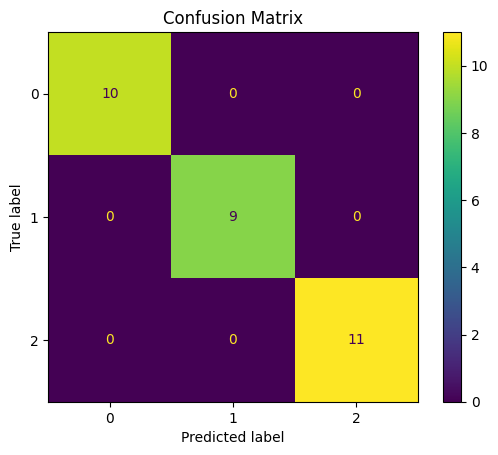

In [78]:
# 11. Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


In [79]:
# 12. Precision, Recall, F1
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [81]:
# 13. Imbalanced data with class weights
model_weighted = LogisticRegression(class_weight='balanced', max_iter=200)
model_weighted.fit(X_train, y_train)
print("Weighted Accuracy:", model_weighted.score(X_test, y_test))

Weighted Accuracy: 1.0


In [83]:
# 15. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, iris.target, test_size=0.2)
model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_s, y_train)
print("Scaled Accuracy:", model_scaled.score(X_test_s, y_test))

Scaled Accuracy: 0.9666666666666667


In [85]:
# 17. Custom learning rate (C)
model_cust = LogisticRegression(C=0.5, max_iter=200)
model_cust.fit(X_train, y_train)
print("Custom C Accuracy:", model_cust.score(X_test, y_test))

Custom C Accuracy: 0.26666666666666666


In [87]:
# 18. Feature Importance
importance = np.abs(model.coef_)
print("Feature Importance:", importance)

Feature Importance: [[0.39345607 0.96251768 2.37512436 0.99874594]
 [0.50843279 0.25482714 0.21301129 0.77574766]
 [0.11497673 0.70769055 2.58813565 1.7744936 ]]


In [89]:
# 19. Cohen's Kappa
print("Kappa Score:", cohen_kappa_score(y_test, y_pred))

Kappa Score: -0.11298482293423273


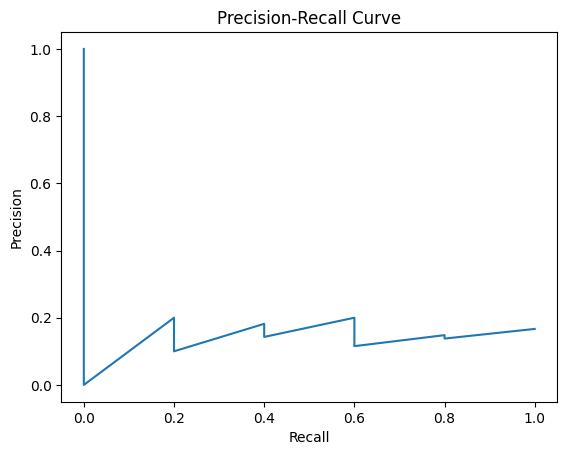

In [90]:

# 20. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [92]:
# Solvers Comparison
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    m = LogisticRegression(solver=solver, max_iter=500)
    m.fit(X_train, y_train)
    print(f"Solver {solver} Accuracy:", m.score(X_test, y_test))

Solver liblinear Accuracy: 0.26666666666666666
Solver saga Accuracy: 0.3
Solver lbfgs Accuracy: 0.3


In [94]:
# 22. Matthews Correlation Coefficient
print("MCC:", matthews_corrcoef(y_test, y_pred))

MCC: -0.11557291118297272


In [96]:
# 23. Raw vs Scaled Data
model_raw = LogisticRegression(max_iter=200).fit(X_train, y_train)
acc_raw = model_raw.score(X_test, y_test)
acc_scaled = model_scaled.score(X_test_s, y_test)
print("Raw Accuracy:", acc_raw)
print("Scaled Accuracy:", acc_scaled)

Raw Accuracy: 0.3
Scaled Accuracy: 0.9666666666666667


In [98]:
# 23. Raw vs Scaled Data
model_raw = LogisticRegression(max_iter=200).fit(X_train, y_train)
acc_raw = model_raw.score(X_test, y_test)
acc_scaled = model_scaled.score(X_test_s, y_test)
print("Raw Accuracy:", acc_raw)
print("Scaled Accuracy:", acc_scaled)

Raw Accuracy: 0.3
Scaled Accuracy: 0.9666666666666667


In [100]:
# 25. Save and Load with Joblib
dump(model, 'logreg_model.joblib')
loaded_model = load('logreg_model.joblib')
print("Loaded Model Accuracy:", loaded_model.score(X_test, y_test))

Loaded Model Accuracy: 0.26666666666666666
